In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [5]:
data = pd.read_csv('dataset/predictive_maintenance.csv')  # Load your dataset
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# Display first few rows
print(data.head())

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000       

In [3]:
data.fillna(method='ffill', inplace=True)  # Fill missing values


C:\Users\HP\AppData\Local\Temp\ipykernel_2508\1596838037.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Fill missing values


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Product ID'] = label_encoder.fit_transform(data['Product ID'])
data['Type'] = label_encoder.fit_transform(data['Type'])


In [7]:
X = data.drop(['UDI', 'Target', 'Failure Type'], axis=1)
y = data['Failure Type'].apply(lambda x: 1 if x == 'No Failure' else 0)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.60      0.71        65
           1       0.99      1.00      0.99      1935

    accuracy                           0.98      2000
   macro avg       0.93      0.80      0.85      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.7984496124031008


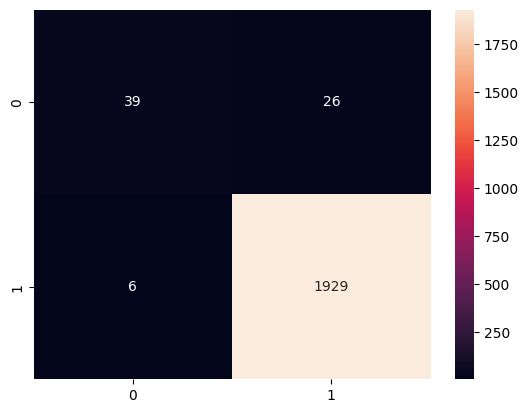

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.85      0.54      0.66        65
           1       0.98      1.00      0.99      1935

    accuracy                           0.98      2000
   macro avg       0.92      0.77      0.83      2000
weighted avg       0.98      0.98      0.98      2000

ROC-AUC Score: 0.76768038163387


Analytics, extracting graph, and finding other insights of data.

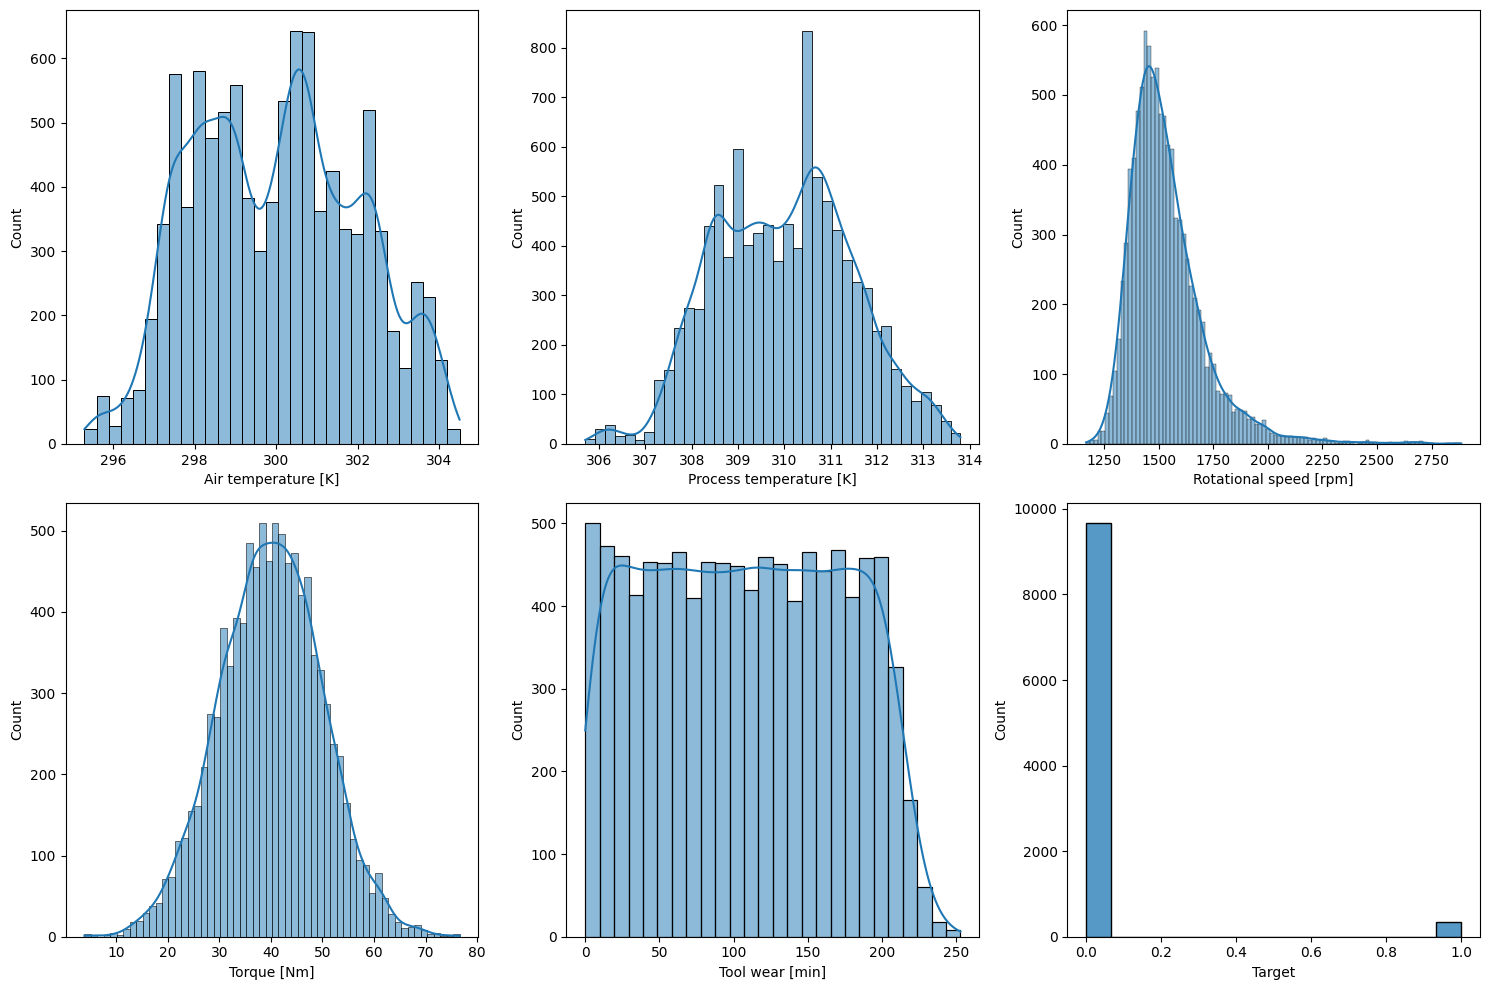

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data['Air temperature [K]'], kde=True, ax=axes[0, 0])
sns.histplot(data['Process temperature [K]'], kde=True, ax=axes[0, 1])
sns.histplot(data['Rotational speed [rpm]'], kde=True, ax=axes[0, 2])
sns.histplot(data['Torque [Nm]'], kde=True, ax=axes[1, 0])
sns.histplot(data['Tool wear [min]'], kde=True, ax=axes[1, 1])
sns.histplot(data['Target'], kde=False, ax=axes[1, 2])

plt.tight_layout()
plt.show()


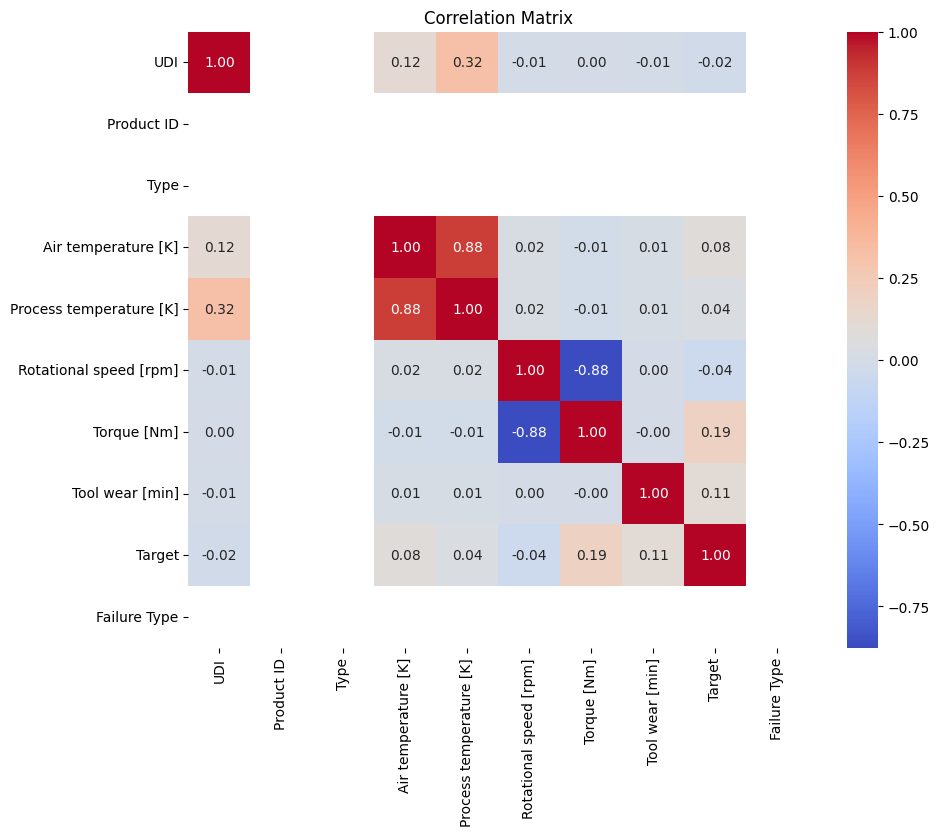

In [8]:
# Convert non-numeric columns to numeric
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = data_numeric.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


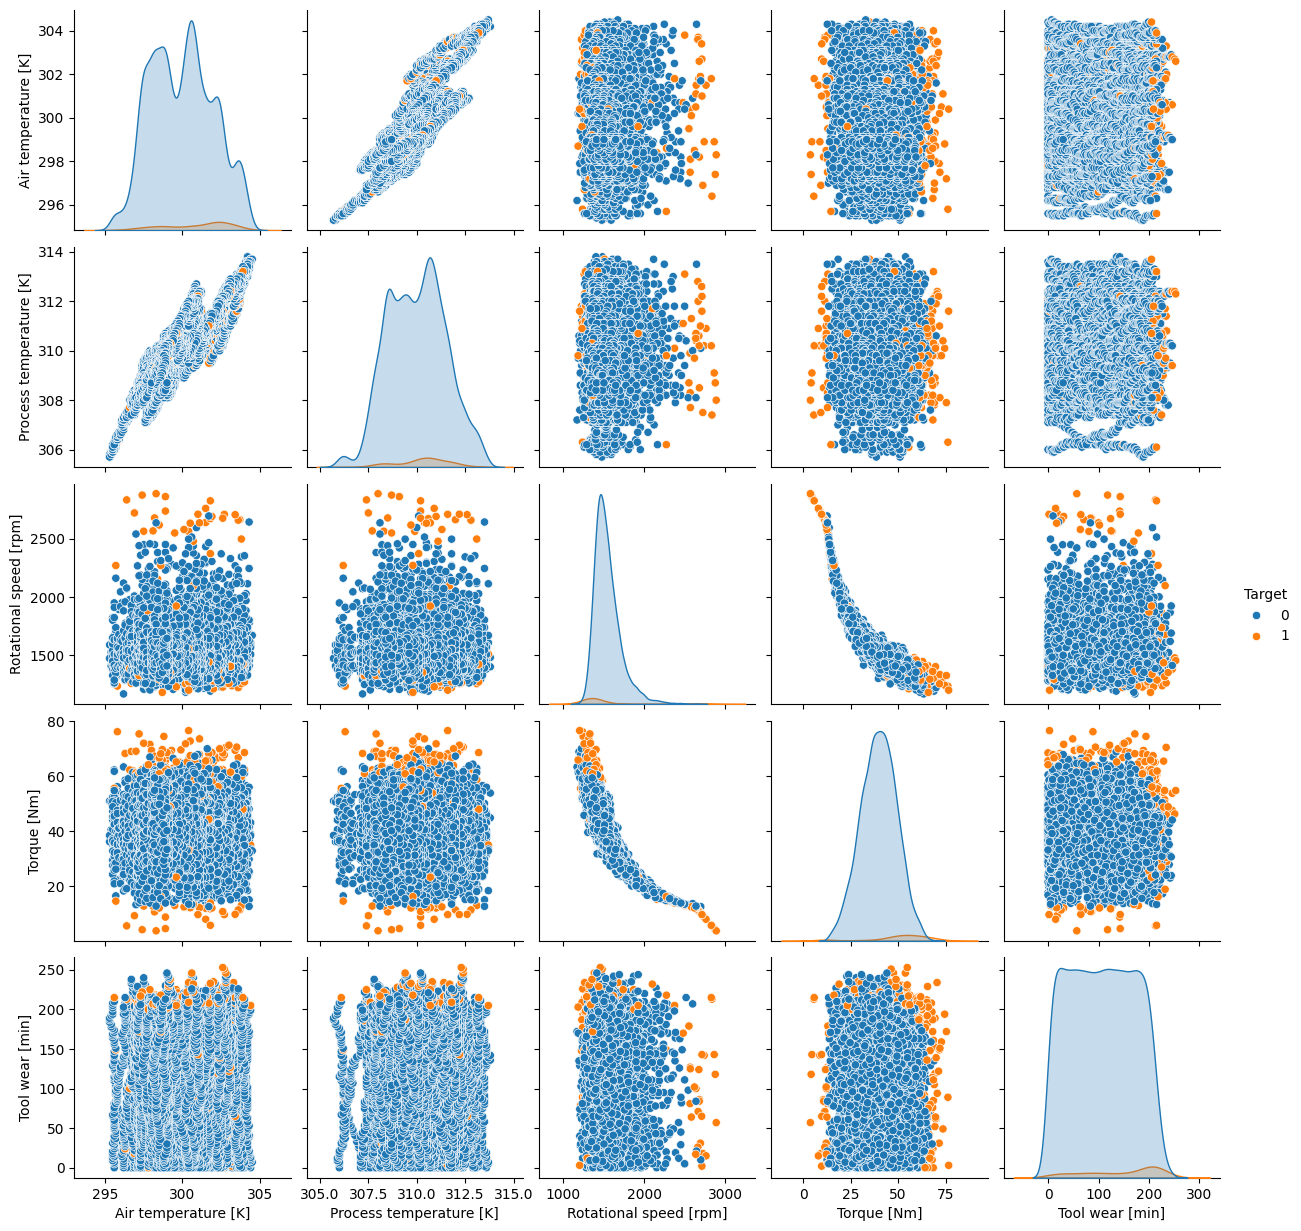

In [9]:
sns.pairplot(data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']], hue='Target')
plt.show()


In [10]:
data['Temp_Diff'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['Torque_Speed'] = data['Torque [Nm]'] * data['Rotational speed [rpm]']


In [11]:
data['Rolling_Torque'] = data['Torque [Nm]'].rolling(window=5).mean()
